# Twitter Dataset Analysis

In [1]:
# importing libraries
import pandas as pd

In [2]:
import numpy as np

# Importing Twitter Dataset

In [3]:
# Read Twitter dataset from .csv file and store into a DataFrame object
df = pd.read_csv('../datasets/training.1600000.processed.noemoticon.csv', names=['sentiment', 'id', 'date', 'query', 'user_name', 'text'], encoding='ISO-8859-1')

In [4]:
# Read the first 5 entries in the dataset using dataframe.head(n) method
df.head(5)

,sentiment,id,date,query,user_name,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
# Read the last 5 entries  in the dataset using dataframe.tail(n) method
df.tail(5)

,sentiment,id,date,query,user_name,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [6]:
# Drop all rows with null values
df.dropna(inplace=True)

In [7]:
# Create new column "rating"
# assign all positive tweets with 1
# assign all negative tweets with 0
df['rating'] = np.where(df['sentiment'] > 0, 1, 0)

In [8]:
# Check the dataset for last change
df.head()

,sentiment,id,date,query,user_name,text,rating
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0


In [9]:
# Check mean (average) on "rating" column
df['rating'].mean()

0.5

# Data Distribution

In [10]:
# Positive Tweets
df[df['rating'] == 1].count()

sentiment    800000
id           800000
date         800000
query        800000
user_name    800000
text         800000
rating       800000
dtype: int64

In [11]:
# Negative Tweets
df[df['rating'] == 0].count()

sentiment    800000
id           800000
date         800000
query        800000
user_name    800000
text         800000
rating       800000
dtype: int64

In [12]:
# Check the count of positive and negative tweets in the dataset
# using .value_counts() method
df['rating'].value_counts()

1    800000
0    800000
Name: rating, dtype: int64

In [13]:
# Check column names and types in the DataFrame using .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 1599999
Data columns (total 7 columns):
sentiment    1600000 non-null int64
id           1600000 non-null int64
date         1600000 non-null object
query        1600000 non-null object
user_name    1600000 non-null object
text         1600000 non-null object
rating       1600000 non-null int64
dtypes: int64(3), object(4)
memory usage: 97.7+ MB


# Tweet Length Distribution

In [14]:
# We drop the following columns: sentiment, id, date, query, user_name
df_dataset = df.drop(['sentiment', 'id', 'date', 'query', 'user_name'], axis=1)

In [15]:
# We check the new dataset for last changes
df_dataset.head()

,text,rating
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [16]:
# We create a new column "text_len" and assign the lenght of each tweet text
df_dataset['text_len'] = [len(t) for t in df_dataset['text']]

In [17]:
# We check the dataset for last changes
df_dataset.head()

,text,rating,text_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,115
1,is upset that he can't update his Facebook by ...,0,111
2,@Kenichan I dived many times for the ball. Man...,0,89
3,my whole body feels itchy and like its on fire,0,47
4,"@nationwideclass no, it's not behaving at all....",0,111


In [18]:
# We filter all tweets that have the length higher than 150 and display the first 10 tweets
df_dataset[df_dataset['text_len'] > 150].head(10)

,text,rating,text_len
1767,tks pa 4 &quot;tapauing&quot; croissant tuna k...,0,152
3434,@danielhcwong Taylor 814ce --&gt; #&amp;$(#&am...,0,157
6894,Woke up early this morning to &quot;not all th...,0,158
13538,Took niece &amp; nephew to Blockbuster- rented...,0,167
16809,@SongzYuuup wat is the name of ur mixtape with...,0,161
17007,Tanned and had dinner with my Dad. Now TWO Joh...,0,160
19818,I don't like it when people use the word &quot...,0,168
20666,&quot;Now is no time 2go headlong in2 a diffic...,0,151
21867,i love u bro. thanks for all the memories:sar...,0,156
23088,@jeffpulver sayin' &quot;hi&quot;. Still upset...,0,152


# Plotting Distribution Tweet Lenght

In [19]:
# Plot the distribution tweet length across the dataset
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7f62a3714fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f62a3726978>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f62a3714e80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f62a36b4208>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f62a36b4668>],
 'means': []}

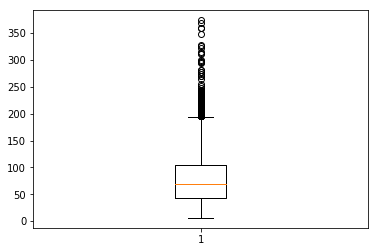

In [20]:
plt.boxplot(df_dataset['text_len'])

In [21]:
df_dataset[df_dataset.text_len > 150].loc[19818].text

"I don't like it when people use the word &quot;fag&quot; &quot;gay&quot; or &quot;retarded&quot; as a derogative term to describe things they don't like. It's immature "

# Wordcloud

In [22]:
# Checking negative words from dataset
neg_phrases = df_dataset[df_dataset['rating'] == 0]

In [23]:
neg_words = []

In [24]:
for t in neg_phrases.text:
    neg_words.append(t)

In [25]:
# Display the first 4 negative tweets
neg_words[:4]

["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ']

In [26]:
# Concatenate negative tweets on space delimiter
neg_text = pd.Series(neg_words).str.cat(sep=' ')

In [27]:
neg_text[:300]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah! @Kenichan I dived many times for the ball. Managed to save 50%  The rest"

In [28]:
for t in neg_phrases.text[:300]:
    if 'good' in t:
        print(t)

@cocomix04 ill tell ya the story later  not a good day and ill be workin for like three more hours...
A bad nite for the favorite teams: Astros and Spartans lose.  The nite out with T.W. was good.
I know my life has been flipped upside down when I just thought in my head that some Ramen sounds good. 
Picked Mich St to win it all from the get go.  Was feeling pretty good about that pick all the way up until......tonight.  A's lost too 
Today I realized I am too good at hiding things, even I can't find it 
spencer is not a good guy. 
@goodlaura What about Reese dying on #TTSC? And season finale next week.  #24 boring, Madame President is a crazy woman.
@DonnieWahlberg I hope i can make it to the auburn show. but its not looking good for me 
Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. 
@LevenRambin: Take it easy, and be good to you. 
Just called Hillsong again - they said they couldn't tel

In [29]:
# Checking positive words from dataset
pos_phrases = df_dataset[df_dataset['rating'] == 1]

In [30]:
pos_words = []

In [31]:
for t in pos_phrases.text:
    pos_words.append(t)

In [32]:
# Display the first 4 positive tweets
pos_words[:4]

['I LOVE @Health4UandPets u guys r the best!! ',
 'im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!',
 '@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. ',
 'Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup']

In [33]:
# Concatenate positive tweets on space delimiter
pos_text = pd.Series(pos_words).str.cat(sep=' ')

In [34]:
pos_text[:100]

'I LOVE @Health4UandPets u guys r the best!!  im meeting up with one of my besties tonight! Cant wait'

# Plotting Wordcloud on Twitter Dataset

In [35]:
!pip3 install wordcloud --user

In [36]:
from wordcloud import WordCloud

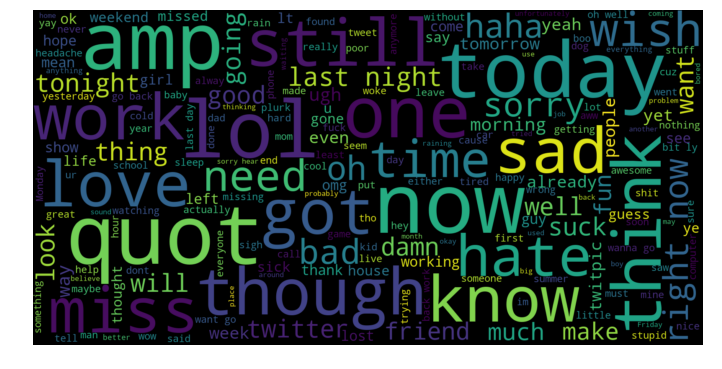

In [37]:
# Plotting Wordcloud of negative words
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

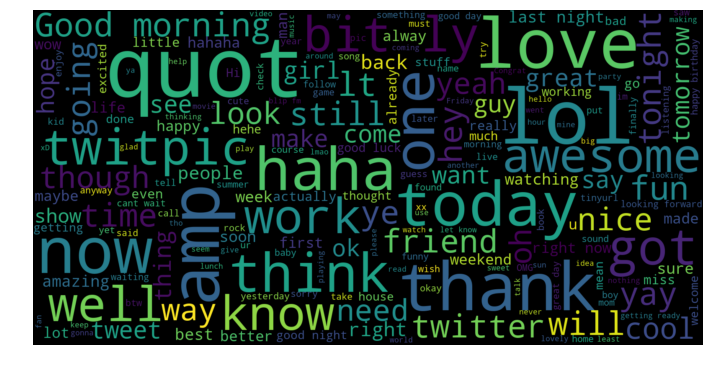

In [38]:
# Plotting Wordcloud of positive words
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Dataset Evaluation

In [39]:
# Assign tweet text from dataframe to variable tweet_text
tweet_text = df_dataset['text']

In [40]:
# Check tweet text
tweet_text

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
5                              @Kwesidei not the whole crew 
6                                                Need a hug 
7          @LOLTrish hey  long time no see! Yes.. Rains a...
8                       @Tatiana_K nope they didn't have it 
9                                  @twittera que me muera ? 
10               spring break in plain city... it's snowing 
11                                I just re-pierced my ears 
12         @caregiving I couldn't bear to watch it.  And ...
13         @octolinz16 It it counts, idk why I did either...
14         @smarrison i would've been the first, but i di...
15         @iamjazzyfizzle I wish I got to watch it with ...
16         Hollis' death

In [41]:
# Assign tweet sentiment from dataframe to variable sentiment
sentiment = df_dataset['rating']

In [42]:
sentiment

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
1599970    1
1599971    1
1599972    1
1599973    1
1599974    1
1599975    1
1599976    1
1599977    1
1599978    1
1599979    1
1599980    1
1599981    1
1599982    1
1599983    1
1599984    1
1599985    1
1599986    1
1599987    1
1599988    1
1599989    1
1599990    1
1599991    1
1599992    1
1599993    1
1599994    1
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: rating, Length: 1600000, dtype: int64

In [43]:
# We split our data into training and test sets using tweet text and sentiment
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweet_text, sentiment, random_state=0)

In [44]:
# Printing the first 5 entries in the X_train we have:
X_train[:5]

22083      Just bought new tax disc for my car. The first...
244558     @Tasha_MCFLY as i dont like it! , its too brig...
199331     @nemosocean awww!   we all just met... what pr...
1508960    lesson of the night: don't watch shows about m...
1529757    @Ed_Gardam I still have a lot of nannying work...
Name: text, dtype: object

In [45]:
# Using X_train.shape we can get an insight of how many tweets or documents we have in the train data
X_train.shape

(1200000,)

# CountVectorizer (Bag-of-Words Model)

In [46]:
# We need to convert these documents into a numeric representation that Skit-learn can use
# We use the bag-of-words approach which is simple and commonly used to represent text for ML

In [47]:
# CountVectorizer allows us to use the bag-of-words approach by converting a collection of text
# documents into a matrix of token counts

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
vect = CountVectorizer(stop_words='english').fit(X_train)

In [50]:
# Fitting the count vectorizer tokenizes each document by finding all sequences of characters
# of at least two letters.
# It converts everything to lowercase and builds a vocabulary using these tokens

In [51]:
# We can get the vocabulary using .get_feature_names() method:
vect.get_feature_names()[::15000]

['00',
 '4h37n',
 '7j60n',
 'aisy',
 'apes',
 'bassguitar65',
 'bombskeez',
 'cannabisni',
 'chutiyapa',
 'csholm724',
 'desertrose40',
 'dustysnow',
 'everyoneeee',
 'frankenteen',
 'goodlyck',
 'herbster',
 'imanto',
 'jbabyyyy',
 'judgement',
 'kioku',
 'leighbarlow',
 'lunar',
 'mcflo14',
 'mle314',
 'nainarigrl',
 'nyam',
 'paul_hartrick',
 'preternreviews',
 'redfrettchen',
 'rychellemae',
 'shanes',
 'sofutr',
 'suhweeeet',
 'thatdamnrepo',
 'tq7xf',
 'uuuum',
 'whoisjaewood',
 'yeeeeh']

In [52]:
# Looking at the vocabulary we can see that includes words with numbers as well misspellings

In [53]:
# We check the length of get_feature_names to get an insight of how many features we are working with
len(vect.get_feature_names())

564196

In [54]:
# Next, we use the transform method to transform the documents in X_train to a document term matrix
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<1200000x564196 sparse matrix of type '<class 'numpy.int64'>'
	with 8355055 stored elements in Compressed Sparse Row format>

In [55]:
# We use the feature matrix X_train_vectorized to train our model and use LogisticRegression since it works well 
# on high dimensional sparse data
from sklearn.linear_model import LogisticRegression

In [56]:
model = LogisticRegression()

In [57]:
model.fit(X_train_vectorized, y_train)

/home/dacy/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
# Next we make predictions using X_test and compute the (AUC) area under the curve score
from sklearn.metrics import roc_auc_score

In [59]:
predictions = model.predict(vect.transform(X_test))

In [60]:
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.780278407409


In [61]:
# Any words in the X_test that didn't appear in X_train will be just ignored

In [62]:
# We take a look at the coeficients of our model
feature_names = np.array(vect.get_feature_names())

In [63]:
sorted_coef_index = model.coef_[0].argsort()

In [64]:
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))

Smallest Coefs:
['inaperfectworld' 'anqju' 'dontyouhate' 'sadd' 'sad' 'saddened' 'lvbu'
 'pakcricket' 'saddens' 'disappointing']



In [65]:
print('Largest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Largest Coefs:
['tweeterfollow' 'tweeteradder' 'iamsoannoyed' 'myfax' 'honored' 'regs18'
 'jennamadison' 'goldymom' 'tojosan' 'thesupergirl']



In [66]:
# We can check how our dataset behaves using n-gram=2 and filter our english stopwords
vect = CountVectorizer(stop_words='english',ngram_range=(1,2), min_df=5).fit(X_train)

In [67]:
# We take a look at the vocabulary to get an insight how the vocabulary looks like
vect.get_feature_names()[::12000]

['00',
 'asu',
 'breakfast burrito',
 'confinement',
 'documenting',
 'feelin better',
 'going ps',
 'hear hey',
 'island amp',
 'leaving room',
 'lunch later',
 'mrt',
 'paid attention',
 'quot tomorrow',
 'season final',
 'starting blog',
 'think writing',
 'ubuntu 04',
 'welcome june']

In [68]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [69]:
# We check the length of get_feature_names to get an insight of how many features we are working with
len(vect.get_feature_names())

227721

In [70]:
# Next, we use the transform method to transform the documents in X_train to a document term matrix
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<1200000x227721 sparse matrix of type '<class 'numpy.int64'>'
	with 10699067 stored elements in Compressed Sparse Row format>

In [71]:
# We initialize LogistRegression model
model = LogisticRegression()

In [72]:
# Next, we fit our train data vectorized (X_train_vectorized) and the train sentiment prediction (y_train)
model.fit(X_train_vectorized, y_train)

/home/dacy/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
# Next we make predictions using X_test and compute the (AUC) area under the curve score
predictions = model.predict(vect.transform(X_test))

In [74]:
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.785077707274


# TF-IDF (Term Frequency - Inverse Document Frequency)

In [75]:
# TF-IDF allows use to weight terms based on how important are they to a document
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
# We pass min_df=5, which will remove any words from our vocabulary that appear in fewer than 5 documents
vect = TfidfVectorizer(stop_words='english', min_df=5).fit(X_train)

In [77]:
len(vect.get_feature_names())

64718

In [78]:
X_train_vectorized = vect.transform(X_train)

In [79]:
X_train_vectorized

<1200000x64718 sparse matrix of type '<class 'numpy.float64'>'
	with 7676012 stored elements in Compressed Sparse Row format>

In [80]:
model = LogisticRegression()

In [81]:
model.fit(X_train_vectorized, y_train)

/home/dacy/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [82]:
# Next we make predictions using X_test and compute the (AUC) area under the curve score
predictions = model.predict(vect.transform(X_test))

In [83]:
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.780930299288


In [84]:
# We take a look at the coeficients of our model
feature_names = np.array(vect.get_feature_names())

In [85]:
feature_names

array(['00', '000', '000th', ..., 'ø¹', 'ø¹ø', 'ø¹ù'],
      dtype='<U27')

In [86]:
sorted_coef_index = model.coef_[0].argsort()

In [87]:
print('Smallest coefs:{}'.format(feature_names[sorted_coef_index[:20]]))

Smallest coefs:['sad' 'poor' 'sadly' 'miss' 'bummed' 'unfortunately' 'missing' 'sick'
 'died' 'sucks' 'gutted' 'disappointed' 'rip' 'hurts' 'upset' 'wish'
 'disappointing' 'depressing' 'cancelled' 'bummer']


In [88]:
print('Largest coefs:{}'.format(feature_names[sorted_coef_index[:-20:-1]]))

Largest coefs:['thank' 'thanks' 'welcome' 'smile' 'tweeteradder' 'congratulations'
 'smiling' 'glad' 'tweeterfollow' 'proud' 'iamsoannoyed' 'pleasure'
 'congrats' 'yay' 'blessed' 'awesome' 'hehe' 'excited' 'followfriday']


In [89]:
# Next, we make predictions and we check how our model performs
print(model.predict(vect.transform(['not an issue, phone is working', 'an issue, phone is not working'])))

[0 0]


In [90]:
# We can see that our model predicted negative for the first sentence where is positive in place
# while for the second sentence it predicted negatively where is negative in place

In [91]:
# We can improve our model using n-gram=2 and filtering out all english stopwords
vect = CountVectorizer(stop_words='english', min_df=5, ngram_range=(1,2)).fit(X_train)

In [92]:
X_train_vectorized = vect.transform(X_train)

In [93]:
len(vect.get_feature_names())

227721

In [94]:
model = LogisticRegression()

In [95]:
model.fit(X_train_vectorized, y_train)

/home/dacy/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [96]:
# Next we make predictions using X_test and compute the (AUC) area under the curve score
predictions = model.predict(vect.transform(X_test))

In [97]:
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.785077707274


In [98]:
# We take a look at the coeficients of our model
feature_names = np.array(vect.get_feature_names())

In [99]:
sorted_coef_index = model.coef_[0].argsort()

In [100]:
print('Smallest coefs:{}'.format(feature_names[sorted_coef_index[:100]]))

Smallest coefs:['inaperfectworld' 'sad' 'saddens' 'passed away' 'dontyouhate' 'devastated'
 'pakcricket' 'sadd' 'disappointing' 'saddest' 'heartbreaking' 'sadly'
 'xbllygbsn' 'saddened' 'bummed' 'sadface' 'saddd' 'condolences'
 'lost help' 'gutted' 'booooo' 'rest peace' 'unfortunately' 'upsetting'
 'breaks heart' 'disappointed' 'breaking heart' 'boohoo' 'rachelle_lefevr'
 'heartbroken' 'depressed' 'discontinued' 'twugs' 'dissapointed'
 'pics reason' 'missin' 'depressing' 'ruined' 'bummer' 'poorly'
 'dissapointing' 'headache' 'funeral' 'disapointed' 'unsuccessful' 'unfair'
 'got shot' 'hurts' 'poor' 'tummyache' 'wouldn let' 'misses' 'triste'
 'missing' 'x_maxine_x' 'augh' 'rip' 'fathers day' 'iran' 'got excited'
 'cancelled' 'sucks' 'miss' 'sadness' 'upset' 'nooooo' 'letdown' 'unhappy'
 'alas' '3gs' 'farrah' 'tweetdeck iphone' 'lonely' 'noooooooooo' 'canceled'
 'booooooo' 'fleas' 'injured' 'humph' 'unloved' 'hurting' 'boooo' 'hurtful'
 'having luck' 'hav wait' 'urghhh' 'dissapointment' 

In [101]:
print('Largest coefs:{}'.format(feature_names[sorted_coef_index[:-50:-1]]))

Largest coefs:['wish luck' 'doesnt hurt' 'don miss' 'sad sad' 'lonely lonely'
 'doesn hurt' 'won disappointed' 'isn bad' 'won miss' 'didn miss' 'isn sad'
 'wish wish' 'ain bad' 'don sad' 'couldn resist' 'didn fail' 'bad ass'
 'dont sad' 'shame shame' 'finchensnail' 'sorry delay' 'wasn bad'
 'aint bad' 'honored' 'cold lonely' 'want miss' 'fuck yeah' 'smackthis'
 'dont miss' 'thesupergirl' 'wont hurt' 'smiling' 'welcome' 'damn straight'
 'tojosan' 'long lost' 'smilin' 'headache gone' 'genderq' 'raining anymore'
 'sick anymore' 'bad mistake' 'fail fail' 'gratz' 'ouch need'
 'tired thought' 'congratulations' 'didnt pay' 'lost pounds']


In [102]:
# Next, we make predictions and we check how our model performs
print(model.predict(vect.transform(['that is not an issue, it feels good when is working', 'there is an issue, it seems like is taking forever'])))

[1 0]


In [103]:
# We can see that our model performed accurately where the first sentence has been labeled as positive
# while the second sentence has been labeled accurately as negative